In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
df=pd.read_csv("/content/Life Expectancy Data.csv")

In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.rename(columns = {'Country':'country',
                       'Year':'year',
                       'Status':'status',
                       'Life expectancy ':'life_expectancy', 
                       'Adult Mortality':'adult_mortality', 
                       'infant deaths':'infant_deaths',
                       'Alcohol':'alchohol',
                       'percentage expenditure':'percentage_expenditure',
                       'Hepatitis B':'hepatitis_b',
                       'Measles ':'measles',
                       ' BMI ':'bmi',
                       'under-five deaths ':'under-five deaths',
                       'Polio':'polio',
                       'Total expenditure':'total_expenditure',
                       'Diphtheria ':'diphtheria',
                       ' HIV/AIDS':'hiv/aids',
                       'GDP':'gdp',
                       'Population':'population',
                       ' thinness  1-19 years':'thinness_1_19_years',
                       ' thinness 5-9 years':'thinness_5_9_years',
                       'Income composition of resources':'income_composition_of_resources',
                       'Schooling':'schooling'
                       }, inplace = True)

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


schooling                          0.751975
income_composition_of_resources    0.724776
adult_mortality                    0.696359
bmi                                0.567694
hiv/aids                           0.556556
diphtheria                         0.479495
thinness_1_19_years                0.477183
thinness_5_9_years                 0.471584
polio                              0.465556
gdp                                0.461455
alchohol                           0.404877
percentage_expenditure             0.381864
hepatitis_b                        0.256762
under-five deaths                  0.222529
total_expenditure                  0.218086
infant_deaths                      0.196557
year                               0.170033
measles                            0.157586
population                         0.021538
Name: life_expectancy, dtype: float64

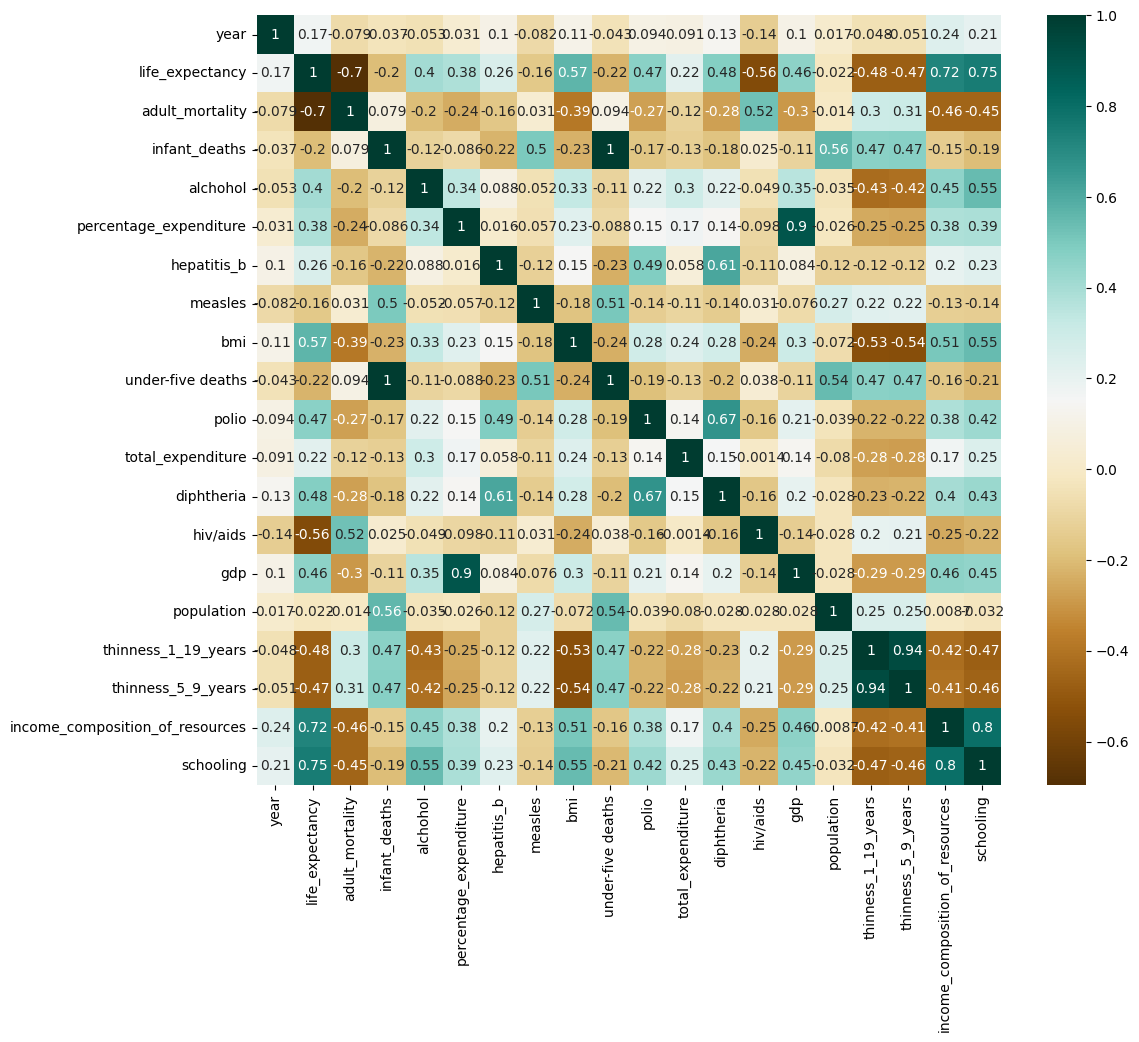

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix=df.corr()

plt.figure(1, figsize=(12,10))
sns.heatmap(corr_matrix, cmap='BrBG', annot=True)

corr_matrix = corr_matrix.drop('life_expectancy')
corr_matrix['life_expectancy'].abs().sort_values(ascending=False)

In [9]:
df['life_expectancy']=df['life_expectancy'].fillna(value=df['life_expectancy'].mean())
df['adult_mortality']=df['adult_mortality'].fillna(value=df['adult_mortality'].mean())
df['alchohol']=df['alchohol'].fillna(value=df['alchohol'].mean())
df.loc[:,'polio'] = df.loc[:,'polio'].ffill()
df.loc[:,'total_expenditure'] = df.loc[:,'total_expenditure'].bfill()
df["diphtheria"].fillna( method ='ffill', inplace = True)



country_index_c = df[(df['gdp'].isnull())].index

developing_gdp_mean = df[df['status']=='Developing'].mean(skipna=True, numeric_only=True).gdp
developed_gdp_mean = df[df['status']=='Developed'].mean(skipna=True, numeric_only=True).gdp

for i in country_index_c:
    if df['status'][i] == 'Developed':
        df.at[i, 'gdp'] = developed_gdp_mean
    if df['status'][i] == 'Developing':
        df.at[i, 'gdp'] = developing_gdp_mean

df.drop('population', axis=1, inplace=True)


column = ['thinness_1_19_years']

developing_thinness_1_19_years_mean = df[df['status']=='Developing'].mean(skipna=True, numeric_only=True).thinness_1_19_years
df['thinness_1_19_years'] = df['thinness_1_19_years'].fillna(developing_thinness_1_19_years_mean)        
developing_thinness_5_9_years_mean = df[df['status']=='Developing'].mean(skipna=True, numeric_only=True).thinness_5_9_years

df['thinness_5_9_years'] = df['thinness_5_9_years'].fillna(developing_thinness_5_9_years_mean)

In [10]:

developing_thinness_1_19_years_mean = df[df['status']=='Developing'].mean(skipna=True, numeric_only=True).income_composition_of_resources
df['income_composition_of_resources'] = df['thinness_1_19_years'].fillna(developing_thinness_1_19_years_mean)        
developing_thinness_5_9_years_mean = df[df['status']=='Developing'].mean(skipna=True, numeric_only=True).income_composition_of_resources

df['income_composition_of_resources'] = df['income_composition_of_resources'].fillna(developing_thinness_5_9_years_mean)

In [11]:
country_index_e = df[(df['schooling'].isnull())].index

developing_schooling_mean = df[df['status']=='Developing'].mean(skipna=True, numeric_only=True).schooling
developed_schooling_mean = df[df['status']=='Developed'].mean(skipna=True, numeric_only=True).schooling

for i in country_index_e:
    if df['status'][i] == 'Developed':
        df.at[i, 'schooling'] = developed_schooling_mean
    if df['status'][i] == 'Developing':
        df.at[i, 'schooling'] = developing_schooling_mean

In [12]:
country_index_d = df[(df['hepatitis_b'].isnull())].index
developing_income_composition_of_resources_mean = df[df['status']=='Developing'].mean(skipna=True, numeric_only=True).hepatitis_b
developed_income_composition_of_resources_mean = df[df['status']=='Developed'].mean(skipna=True, numeric_only=True).hepatitis_b

for i in country_index_d:
    if df['status'][i] == 'Developed':
        df.at[i, 'hepatitis_b'] = developed_income_composition_of_resources_mean
    if df['status'][i] == 'Developing':
        df.at[i, 'hepatitis_b'] = developing_income_composition_of_resources_mean

In [13]:
df.drop('bmi', axis=1, inplace=True)

# model

In [31]:
df_gender = pd.get_dummies(df['country'])

df = pd.concat([df, df_gender], axis=1)
df=df.drop('country', axis=1)
df_gender = pd.get_dummies(df['status'])
df=df.drop('status', axis=1)
df = pd.concat([df, df_gender], axis=1)

In [14]:
df=df.drop('country', axis=1)
df['status'] = df['status'].replace({'Developed': 1, 'Developing': 0})


In [15]:
y=df['life_expectancy']
df=df.drop('life_expectancy', axis=1)
X=df.values

In [16]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 28.0 MB/s eta 0:00:00


In [17]:
import shap
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
normalized_df=(df-df.mean())/df.std()
X=normalized_df.values

In [19]:
y=(y-y.mean())/y.std()

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y.values, test_size=0.1, random_state=42)

In [21]:
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))  # First hidden layer with 10 units and ReLU activation
model.add(Dense(64, activation='relu'))  # First hidden layer with 10 units and ReLU activation
model.add(Dense(1, activation='relu'))  # Output layer with a single unit

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=10)


Epoch 1/20
265/265 [==============================] - 6s 3ms/step - loss: 0.6876
Epoch 2/20
265/265 [==============================] - 1s 3ms/step - loss: 0.6577
Epoch 3/20
265/265 [==============================] - 1s 3ms/step - loss: 0.6491
Epoch 4/20
265/265 [==============================] - 1s 3ms/step - loss: 0.6434
Epoch 5/20
265/265 [==============================] - 1s 3ms/step - loss: 0.6403
Epoch 6/20
265/265 [==============================] - 1s 3ms/step - loss: 0.6372
Epoch 7/20
265/265 [==============================] - 1s 3ms/step - loss: 0.6346
Epoch 8/20
265/265 [==============================] - 1s 3ms/step - loss: 0.6353
Epoch 9/20
265/265 [==============================] - 1s 3ms/step - loss: 0.6322
Epoch 10/20
265/265 [==============================] - 1s 3ms/step - loss: 0.6341
Epoch 11/20
265/265 [==============================] - 1s 3ms/step - loss: 0.6301
Epoch 12/20
265/265 [==============================] - 1s 3ms/step - loss: 0.6292
Epoch 13/20
265/265 [====

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2432      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,753
Trainable params: 10,753
Non-trainable params: 0
_________________________________________________________________


# Deepshap


In [22]:
# select backgroud for shap
explainer_deep = shap.DeepExplainer(model, x_train)
explainer_kernel=shap.KernelExplainer(model, x_train)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [23]:
shap_values_deep = explainer_deep.shap_values(x_test)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


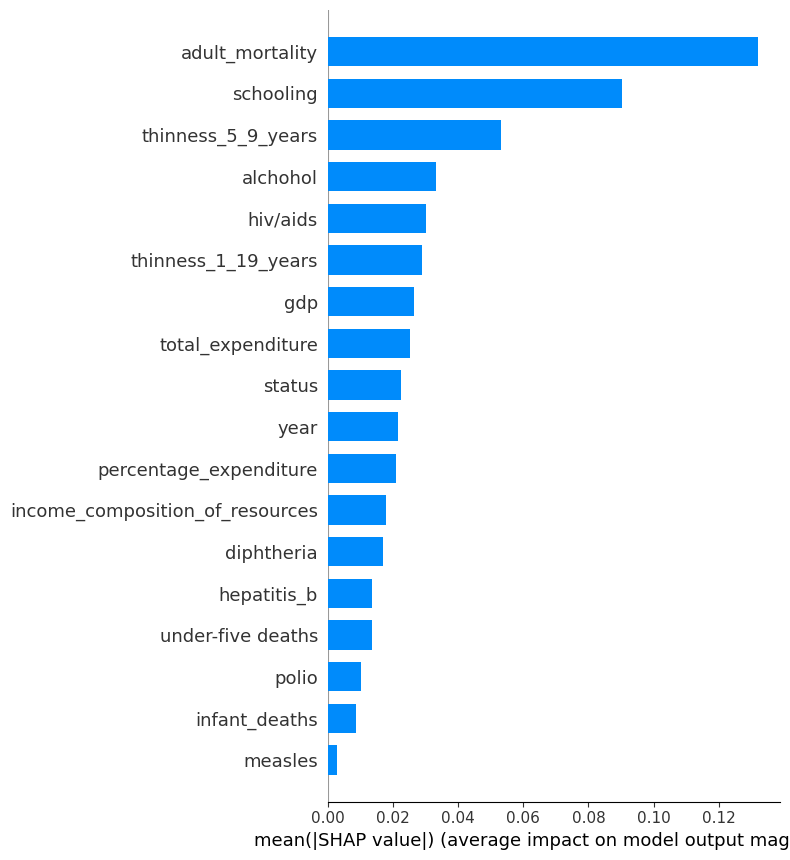

In [24]:
shap.summary_plot(shap_values_deep[0], plot_type = 'bar', feature_names = df.columns)

In [45]:
shap.initjs()
shap.force_plot(explainer_deep.expected_value[0].numpy(), shap_values_deep[0][0], features = df.columns)

In [47]:
shap.initjs()
shap.force_plot(explainer_deep.expected_value[0].numpy(), shap_values_deep[0][3], features = df.columns)

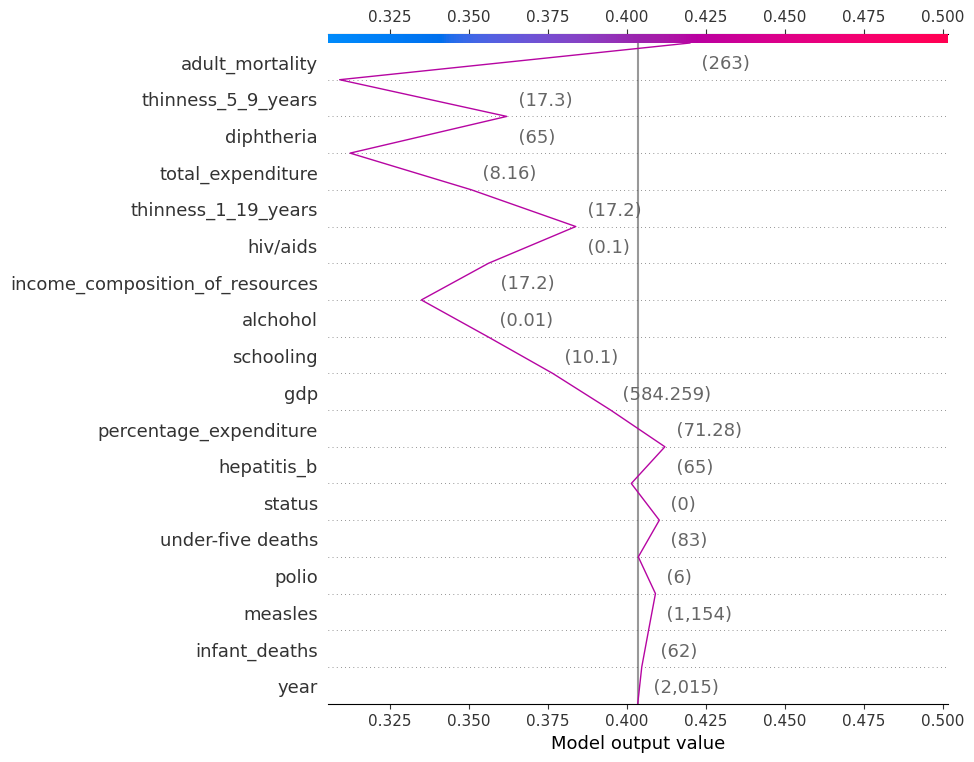

In [26]:
shap.decision_plot(explainer_deep.expected_value[0].numpy(), shap_values_deep[0][0], features = df.iloc[0,:], feature_names = df.columns.tolist())

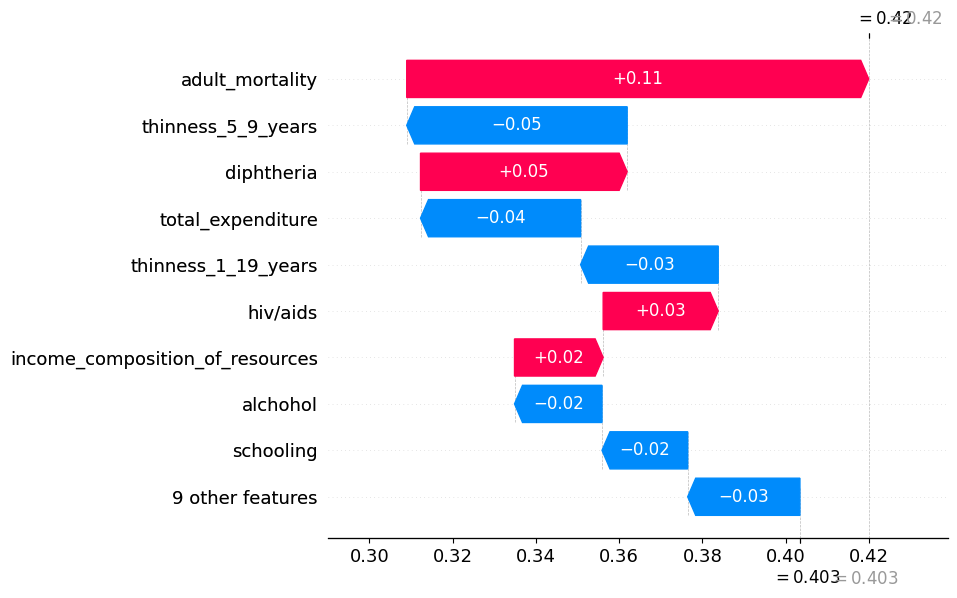

In [27]:
shap.plots._waterfall.waterfall_legacy(explainer_deep.expected_value[0].numpy(), shap_values_deep[0][0], feature_names = df.columns)

# Kernel

In [33]:
explainer_kernel=shap.KernelExplainer(model, x_train)
shap_values_kernel = explainer_kernel.shap_values(x_test)

  0%|          | 0/294 [00:00<?, ?it/s]

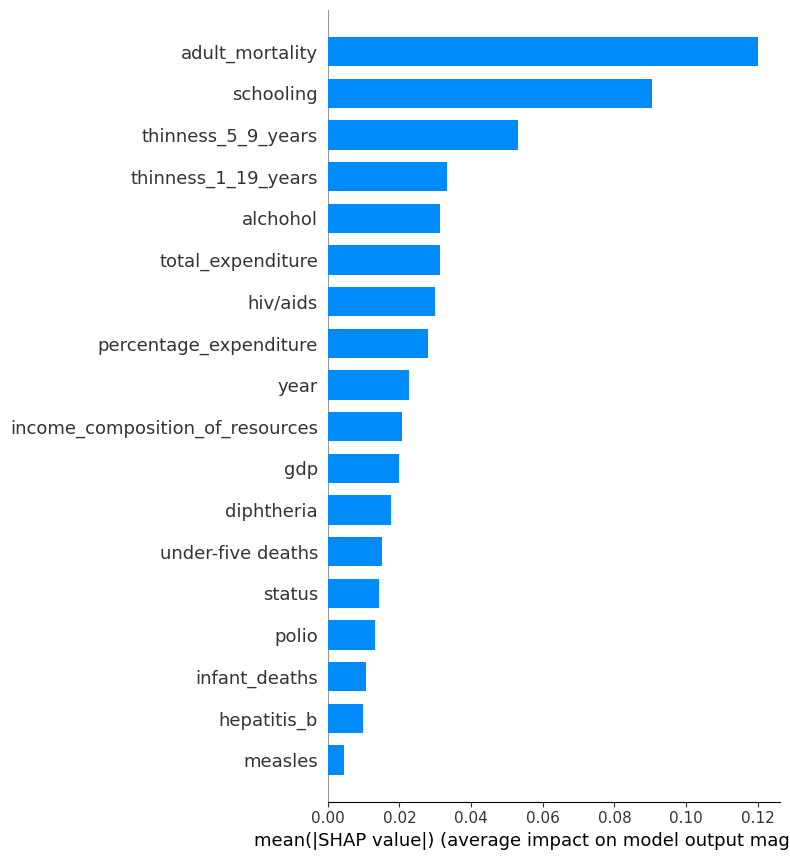

In [34]:
shap.summary_plot(shap_values_kernel[0], plot_type = 'bar', feature_names = df.columns)

In [48]:
shap.initjs()
shap.force_plot(explainer_kernel.expected_value[0], shap_values_kernel[0][0], features = df.columns)

In [49]:
shap.initjs()
shap.force_plot(explainer_kernel.expected_value[0], shap_values_kernel[0][3], features = df.columns)

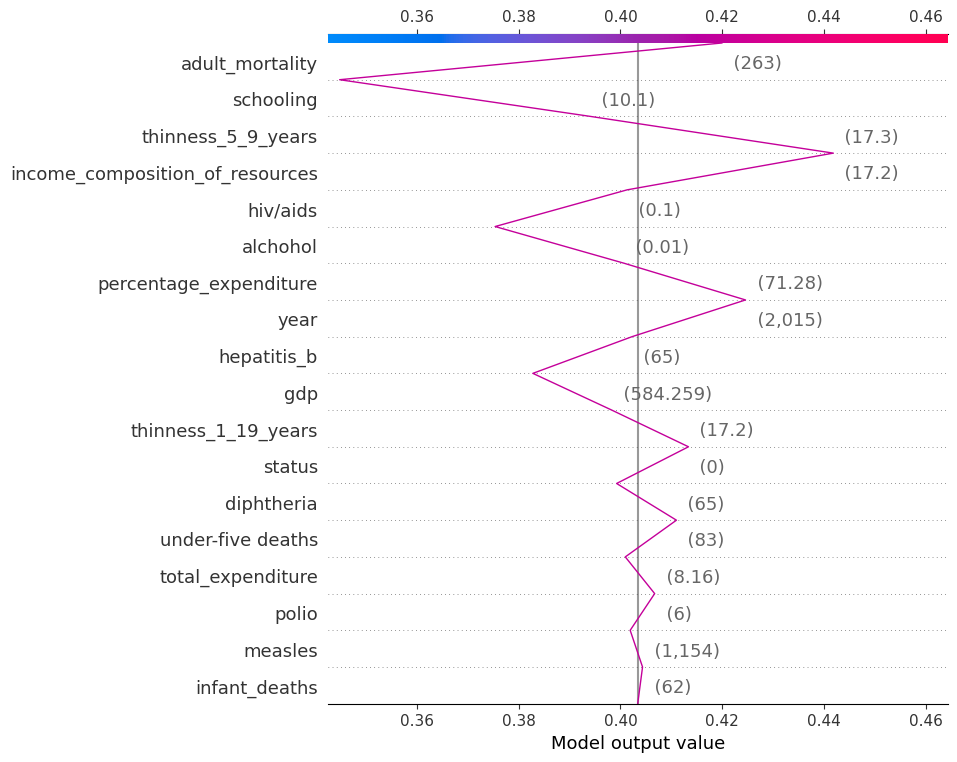

In [39]:
shap.decision_plot(explainer_kernel.expected_value[0], shap_values_kernel[0][0], features = df.iloc[0,:], feature_names = df.columns.tolist())

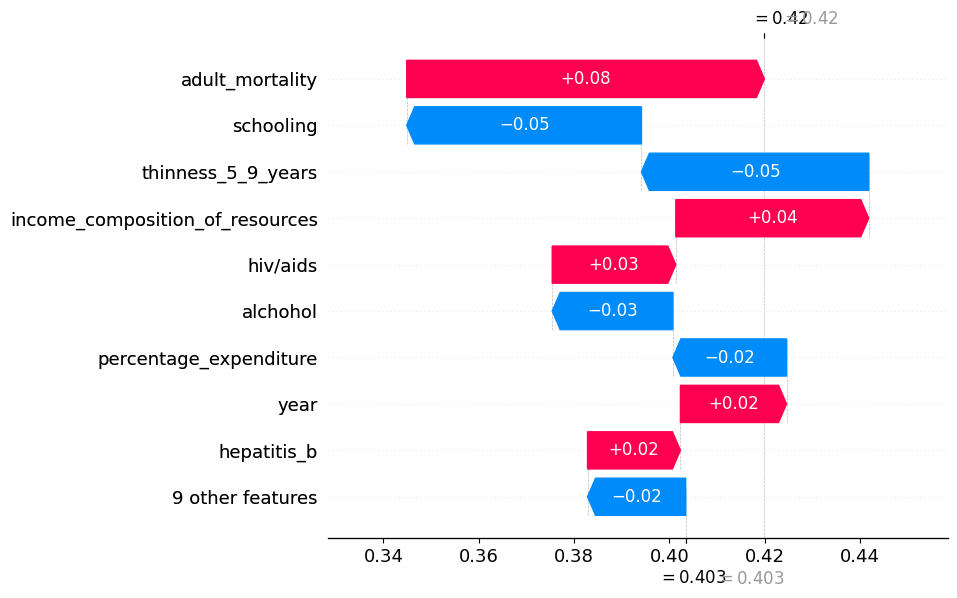

In [40]:
shap.plots._waterfall.waterfall_legacy(explainer_kernel.expected_value[0], shap_values_kernel[0][0], feature_names = df.columns)